<a href="https://colab.research.google.com/github/Gabriela-Alcaide/Leitores_Escritores_Automatico/blob/main/EP2_Readers_and_Writers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import threading
import time
import string

In [2]:
# LEITURA DO ARQUIVO QUE CONTÉM A BASE DE DADOS, NO GOOGLE COLAB
from google.colab import files

# Fazer upload do arquivo
arquivo = files.upload()
base = []

# Retira o apostrofo da string de pontuações a serem retiradas
pontuacoes = string.punctuation.replace("'", "")

# Abrir o arquivo e processar linha por linha
with open('bd.txt', 'r') as file:
    for line in file:
        # Remover a pontuação da linha
        sem_pontuacao = line.translate(str.maketrans('', '', pontuacoes))
        # Adicionar a linha limpa (sem pontuação e espaços extras) à lista
        base.append(sem_pontuacao.strip())

Saving bd.txt to bd.txt


In [ ]:
# Mutex para controlar o acesso à base.
mutex_base = threading.Lock()

In [ ]:
# Leitor SEM uso da solução "Leitores e Escritores".
# Bloqueia acesso à base quando entra na base.
class ReaderSemSolucao:

  def __init__(self):
    self.num_acessos = 0
    self.posicoes_lidas = []
    self.conteudos_lidos = []

  def executar_cem_vezes(self):
    # Bloqueia acesso à base.
    mutex_base.acquire()
    # Ler 100 posições diferentes da base.
    while (self.num_acessos < 100):
      posicao = random.randint(0, len(base) - 1)
      if posicao in self.posicoes_lidas:
        continue
      else:
        self.num_acessos = self.num_acessos + 1
        self.posicoes_lidas.append(posicao)
        self.conteudos_lidos.append(base[posicao])
    # Dormir por 1ms, ainda dentro da base.
    time.sleep(0.001)
    # Desbloquear o acesso à base.
    mutex_base.release()

In [ ]:
# Número de processos lendo.
num_lendo = 0

# Mutex para "num_lendo".
mutex_num_lendo = threading.Lock()

In [ ]:
# Leitor COM uso da solução "Leitores e Escritores".
# Se a base está desbloqueada:
#   E é o primeiro leitor na base, bloqueia para Escritores apenas.
#   E já há outros leitores na base, apenas usa.
# Ao sair:
#   Se outros leitores continuam na base, deixa bloqueada para Escritores (como está).
#   Se não restam leitores na base, desbloqueia a base.
class ReaderComSolucao:

  def __init__(self):
    self.num_acessos = 0
    self.posicoes_lidas = []
    self.conteudos_lidos = []

  def executar_cem_vezes(self):
    global num_lendo
    # Bloquear acesso à "num_leitores."
    mutex_num_lendo.acquire()
    # Há um leitor a mais.
    num_lendo = num_lendo + 1
    # Se é o primeiro leitor, trava a base.
    if (num_lendo == 1):
      # Bloqueia acesso à base.
      mutex_base.acquire()
    # Desbloqueia o acesso à "num_leitores".
    mutex_num_lendo.release()
    # Ler 100 posições diferentes da base.
    while (self.num_acessos < 100):
      posicao = random.randint(0, len(base) - 1)
      if posicao in self.posicoes_lidas:
        continue
      else:
        self.num_acessos = self.num_acessos + 1
        self.posicoes_lidas.append(posicao)
        self.conteudos_lidos.append(base[posicao])
    # Dormir por 1ms, ainda dentro da base.
    time.sleep(0.001)
    # Bloquear acesso à "num_leitores."
    mutex_num_lendo.acquire()
    # Há um leitor a menos.
    num_lendo = num_lendo - 1
    # Se era o último leitor na base, destrava a base.
    if (num_lendo == 0):
      # Bloqueia acesso à base.
      mutex_base.release()
    # Desbloqueia o acesso à "num_leitores".
    mutex_num_lendo.release()

In [ ]:
# Escritor SEM uso da solução "Leitores e Escritores".
# Bloqueia acesso à base quando entra na base.
class WriterSemSolucao:

  def __init__(self):
    self.num_acessos = 0
    self.posicoes_escritas = []

  def executar_cem_vezes(self):
    # Bloqueia acesso à base.
    mutex_base.acquire()
    # Acessar e escrever em 100 posições diferentes da base.
    while (self.num_acessos < 100):
      posicao = random.randint(0, len(base) - 1)
      if posicao in self.posicoes_escritas:
        continue
      else:
        self.num_acessos = self.num_acessos + 1
        self.posicoes_escritas.append(posicao)
        # Escrever na base.
        base[posicao] = 'MODIFICADO'
    # Dormir por 1ms, ainda dentro da base.
    time.sleep(0.001)
    # Desbloquear o acesso à base.
    mutex_base.release()

In [ ]:
# Escritor COM uso da solução "Leitores e Escritores".
# Se a base está desbloqueada para Escritores:
# O escritor bloqueia a base e escreve nela.
# Ao sair:
# Desbloqueia a base.
class WriterComSolucao:

  def __init__(self):
    self.num_acessos = 0
    self.posicoes_escritas = []

  def executar_cem_vezes(self):
    # Bloquear acesso à base.
    mutex_base.acquire()
    # Escrever em 100 posições diferentes da base.
    while (self.num_acessos < 100):
      posicao = random.randint(0, len(base) - 1)
      if posicao in self.posicoes_escritas:
        continue
      else:
        self.num_acessos = self.num_acessos + 1
        self.posicoes_escritas.append(posicao)
        base[posicao] = "MODIFICADO"
    # Dormir por 1ms, ainda dentro da base.
    time.sleep(0.001)
    # Desbloquear acesso à base.
    mutex_base.release()

In [ ]:
# Construir arranjo de objetos Threads.
def construir_arranjo_sem_solucao(num_leitores_arranjo, num_escritores_arranjo):
    # Inicializar leitores e escritores, conforme a quantidade.
    leitores = []
    escritores = []

    if (num_leitores_arranjo == 0):
      for i in range (0, 100):
        escritor = WriterSemSolucao()
        escritores.append(escritor)
    elif (num_escritores_arranjo == 0):
      for i in range (0, 100):
        leitor = ReaderSemSolucao()
        leitores.append(leitor)
    else:
      for i in range(0, num_leitores_arranjo):
        leitor = ReaderSemSolucao()
        leitores.append(leitor)
      for i in range(0, num_escritores_arranjo):
        escritor = WriterSemSolucao()
        escritores.append(escritor)

    # Arranjo de objetos Thread.
    arranjo = leitores + escritores

    # Embaralhar os elementos do arranjo.
    random.shuffle(arranjo)

    return arranjo

In [ ]:
# Rodando o sistema SEM a solução de "Leitores e Escritores".

num_leitores_arranjo = 0
num_escritores_arranjo = 100

tempos_proporcoes_sem_solucao = []

# Para cada proporção.
while (num_leitores_arranjo <= 100):
  # Tempo gasto nessa proporção.
  tempo_nessa_proporcao = 0

  # Rodar o sistema 50 vezes.
  for i in range(0, 50):
    # Reconstruir arranjo de objetos Thread.
    arranjo = construir_arranjo_sem_solucao(num_leitores_arranjo, num_escritores_arranjo)

    # Marcar o momento em que a rodada começou.
    tempo_inicial_rodada = time.time()

    # Executar cada um dos objetos, como uma Thread.
    threads = []
    for o in arranjo:
      t = threading.Thread(target=o.executar_cem_vezes, args=())
      threads.append(t)
      t.start()

    # Aguardar que todos os objetos terminem.
    for t in threads:
      t.join()

    # Marcar o momento em que a rodada terminou.
    tempo_final_rodada = time.time()

    # Adicionar o tempo nessa rodada ao tempo total da proporção.
    tempo_nessa_proporcao = tempo_nessa_proporcao + (tempo_final_rodada - tempo_inicial_rodada)

  # Depois que o sistema roda, nessa proporção, 50 vezes.
  media_tempo_nessa_porporcao = tempo_nessa_proporcao / 50

  # Marcar o tempo médio dessa proporção.
  tempos_proporcoes_sem_solucao.append(media_tempo_nessa_porporcao)

  # Mudar quantidades para nova proporção.
  num_leitores_arranjo = num_leitores_arranjo + 1
  num_escritores_arranjo = num_escritores_arranjo - 1

In [ ]:
# Construir arranjo de objetos Threads.
def construir_arranjo_com_solucao(num_leitores_arranjo, num_escritores_arranjo):
    # Inicializar leitores e escritores, conforme a quantidade.
    leitores = []
    escritores = []

    if (num_leitores_arranjo == 0):
      for i in range (0, 100):
        escritor = WriterComSolucao()
        escritores.append(escritor)
    elif (num_escritores_arranjo == 0):
      for i in range (0, 100):
        leitor = ReaderComSolucao()
        leitores.append(leitor)
    else:
      for i in range(0, num_leitores_arranjo):
        leitor = ReaderComSolucao()
        leitores.append(leitor)
      for i in range(0, num_escritores_arranjo):
        escritor = WriterComSolucao()
        escritores.append(escritor)

    # Arranjo de objetos Thread.
    arranjo = leitores + escritores

    # Embaralhar os elementos do arranjo.
    random.shuffle(arranjo)

    return arranjo

In [ ]:
# Rodando o sistema COM a solução de "Leitores e Escritores".

num_leitores_arranjo = 0
num_escritores_arranjo = 100

tempos_proporcoes_com_solucao = []

# Para cada proporção.
while (num_leitores_arranjo <= 100):
  # Tempo gasto nessa proporção.
  tempo_nessa_proporcao = 0

  # Rodar o sistema 50 vezes.
  for i in range(0, 50):
    # Reconstruir arranjo de objetos Thread.
    arranjo = construir_arranjo_com_solucao(num_leitores_arranjo, num_escritores_arranjo)

    # Marcar o momento em que a rodada começou.
    tempo_inicial_rodada = time.time()

    # Executar cada um dos objetos, como uma Thread.
    threads = []
    for o in arranjo:
      t = threading.Thread(target=o.executar_cem_vezes, args=())
      threads.append(t)
      t.start()

    # Aguardar que todos os objetos terminem.
    for t in threads:
      t.join()

    # Marcar o momento em que a rodada terminou.
    tempo_final_rodada = time.time()

    # Adicionar o tempo nessa rodada ao tempo total da proporção.
    tempo_nessa_proporcao = tempo_nessa_proporcao + (tempo_final_rodada - tempo_inicial_rodada)

  # Depois que o sistema roda, nessa proporção, 50 vezes.
  media_tempo_nessa_porporcao = tempo_nessa_proporcao / 50

  # Marcar o tempo médio dessa proporção.
  tempos_proporcoes_com_solucao.append(media_tempo_nessa_porporcao)

  # Mudar quantidades para nova proporção.
  num_leitores_arranjo = num_leitores_arranjo + 1
  num_escritores_arranjo = num_escritores_arranjo - 1

In [ ]:
com_sol = 0

for s in range(0, 101):
  if tempos_proporcoes_com_solucao[s] < tempos_proporcoes_sem_solucao[s]:
    com_sol = com_sol + 1

In [ ]:
# Sistema COM uso da solução Leitores e Escritores foi melhor em 94% dos casos.
com_sol / 101

0.9603960396039604

In [ ]:
duracao_sem_sol = sum(tempos_proporcoes_sem_solucao)
duracao_com_sol = sum(tempos_proporcoes_com_solucao)

prop = duracao_sem_sol / duracao_com_sol

In [ ]:
# O sistema COM uso da solução Leitores e Escritores foi 45% melhor.
prop

1.489591965056484

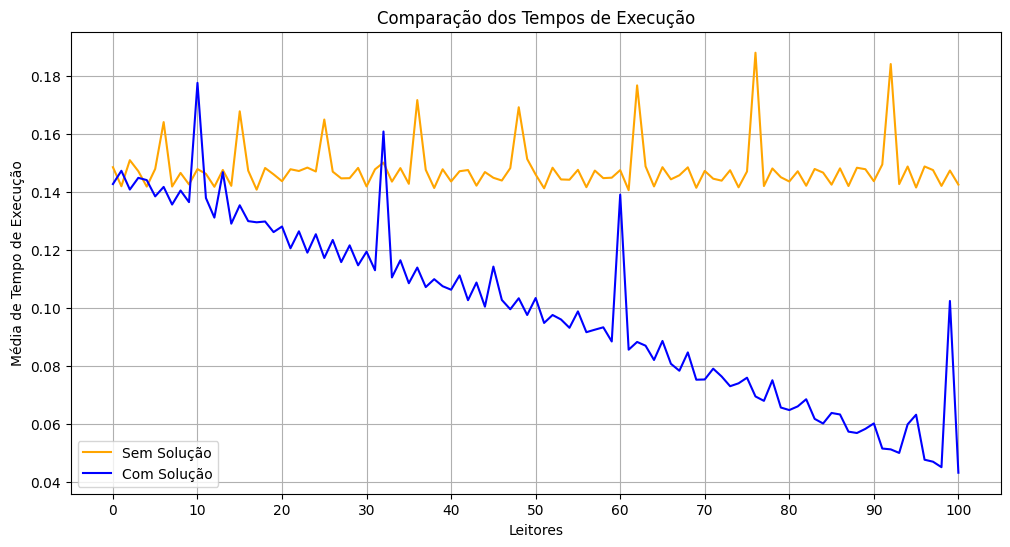

In [ ]:
import matplotlib.pyplot as plt

# Cria um indice para o eixo x
x = range(len(tempos_proporcoes_com_solucao))

# Muda a proporção da imagem para melhorar a visibilidade
plt.figure(figsize=(12,6))

# Coloca as informações no grafico, sem solução
plt.plot(x, tempos_proporcoes_sem_solucao, color='orange', label='Sem Solução')
# Coloca as informações no grafico, com solução
plt.plot(x, tempos_proporcoes_com_solucao, color='blue', label='Com Solução')

# Cria um titulo e legendas
plt.xlabel('Leitores')
plt.ylabel('Média de Tempo de Execução')
plt.title('Comparação dos Tempos de Execução')
plt.legend()

# Adiciona grade e altera intervalos para facilitar compreensão
plt.grid(True)
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])

# Salvar o gráfico.
plt.savefig('grafico_linhas.png')

# Plota o gráfico
plt.show()

In [ ]:
# Escrever valores de "tempos_proporcoes_sem_solucao" em um arquivo.
with open('sem_solucao.txt', 'w') as file:
    for t in tempos_proporcoes_sem_solucao:
        file.write(f"{t}\n")

In [ ]:
from google.colab import files
files.download('sem_solucao.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Escrever valores de "tempos_proporcoes_com_solucao" em um arquivo.
with open('com_solucao.txt', 'w') as file:
    for t in tempos_proporcoes_com_solucao:
        file.write(f"{t}\n")

In [ ]:
from google.colab import files
files.download('com_solucao.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

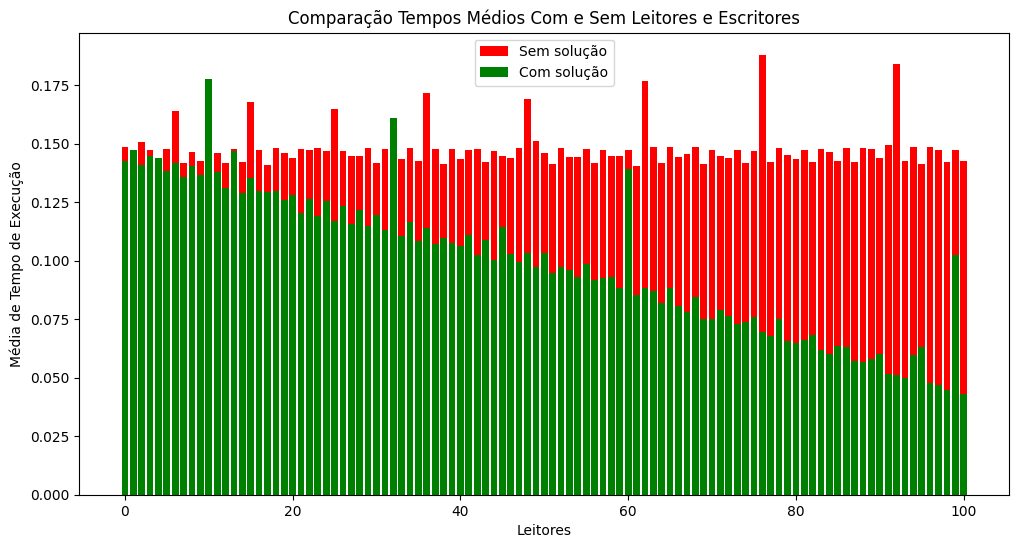

In [ ]:
import matplotlib.pyplot as plt

props = []
for i in range(0, 101):
  props.append(i)

plt.figure(figsize=(12,6))

plt.bar(props, tempos_proporcoes_sem_solucao, color="red", label="Sem solução")
plt.bar(props, tempos_proporcoes_com_solucao, color="green", label="Com solução")

plt.title('Comparação Tempos Médios Com e Sem Leitores e Escritores')
plt.xlabel('Leitores')
plt.ylabel('Média de Tempo de Execução')
plt.legend()

plt.savefig('barras_comp.png')

plt.show()

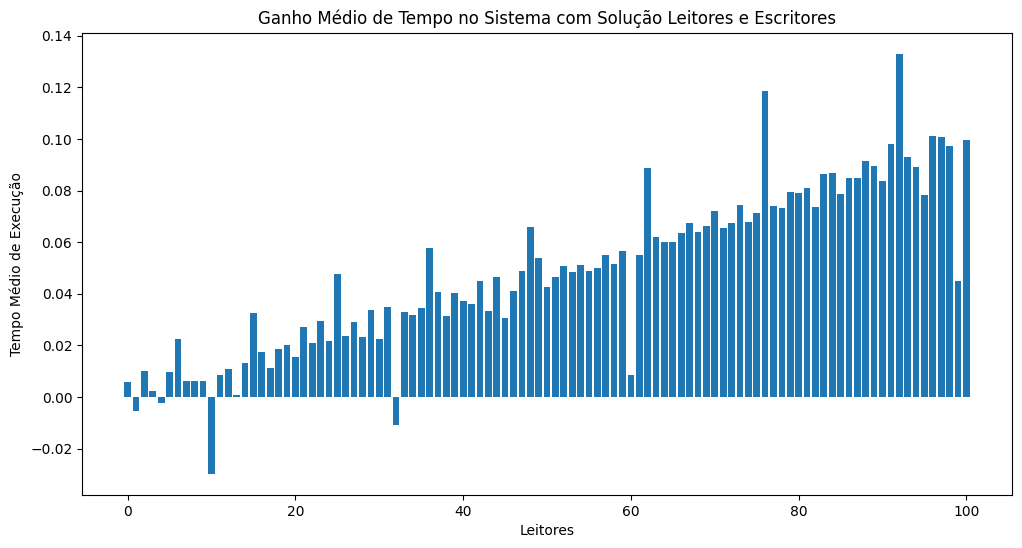

In [ ]:
difs = []

for s in range(0, 101):
  difs.append(tempos_proporcoes_sem_solucao[s] - tempos_proporcoes_com_solucao[s])

props = []
for i in range(0, 101):
  props.append(i)

plt.figure(figsize=(12,6))

plt.bar(props, difs)

plt.title('Ganho Médio de Tempo no Sistema com Solução Leitores e Escritores')
plt.xlabel('Leitores')
plt.ylabel('Tempo Médio de Execução')

plt.savefig('barras_dif.png')

plt.show()

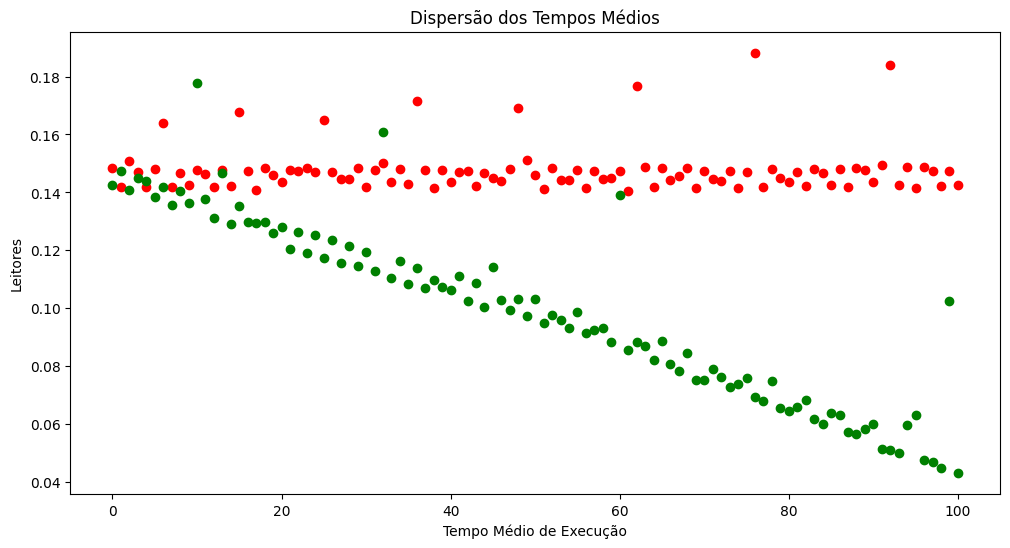

In [ ]:
props = []
for i in range(0, 101):
  props.append(i)

plt.figure(figsize=(12,6))

plt.scatter(props, tempos_proporcoes_sem_solucao, color='red', marker='o')
plt.scatter(props, tempos_proporcoes_com_solucao, color='green', marker='o')

plt.title('Dispersão dos Tempos Médios')
plt.xlabel('Tempo Médio de Execução')
plt.ylabel('Leitores')

plt.savefig('dispersao.png')

In [ ]:
files.download('grafico_linhas.png')
files.download('barras_comp.png')
files.download('barras_dif.png')
files.download('dispersao.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

props = []
for i in range (0, 101):
  props.append(f"{i} leitores e {100-i} escritores")

dados = {
    'Proporção': props,
    'Tempo médio sem Readers e Writers': tempos_proporcoes_sem_solucao,
    'Tempo médio com Readers e Writers': tempos_proporcoes_com_solucao,
    'Ganho com Readers e Writers': difs
}

tabela = pd.DataFrame(dados)

tabela.to_excel('tabela.xlsx', index=False)

In [ ]:
files.download('tabela.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>